### Implementing simple Chatbot using LangGraph

In [20]:
from typing_extensions import TypedDict
from langgraph.graph import START , END , StateGraph
from IPython.display import Image , display

# Introducing Reducers

from typing import Annotated
from langgraph.graph.message import add_messages

 **Annotated** : Here it basically combine messages based on ID.

 It mean if and conversation is going on between Human and AI , it give keep appending those messages 

 Like Human Message + AI message + Human message + AI response +.......

 This is done with **Annotated** combined with **add_messageS**

 Here this add message is called : -->

 #### Reducer 

In [21]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [22]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [23]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="o1-mini")
llm.invoke("Hello")

AIMessage(content='Hello! 😊 How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 9, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o1-mini-2024-09-12', 'system_fingerprint': 'fp_1f2eb2a0a3', 'id': 'chatcmpl-CGkAIu3b0Z1OWfJfRLqkKlYsaSV89', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--62d2fe72-1a98-43b0-bf19-0bba95ac84ae-0', usage_metadata={'input_tokens': 9, 'output_tokens': 85, 'total_tokens': 94, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 64}})

In [24]:
from langchain_groq import ChatGroq
llm_grok = ChatGroq(model="qwen/qwen3-32b")
llm_grok.invoke("Hey I am Pawan and i like playing cricket what are two important rules in cricket ? explain in 30 words")

AIMessage(content="<think>\nOkay, the user is Pawan and he likes playing cricket. He wants to know two important rules in cricket explained in 30 words. Let me start by recalling the key rules.\n\nFirst, the batting rules. There's the concept of scoring runs. Batsmen can score by running between the wickets or hitting the ball to the boundary. Runs are crucial for winning, so that's important.\n\nSecond, the bowling and dismissal rules. A bowler delivers the ball, and if the batsman misses, they might get out. Types of dismissals include bowled, caught, or run out. Wickets are essential because once all are lost, the innings ends.\n\nWait, maybe I should structure it more clearly. Let me pick two main rules. The first could be scoring runs through running or boundaries. The second could be the dismissal rules, like how a player is out. Need to keep it concise. Also, check the word count. Let me make sure each rule is explained briefly, within the limit. Avoid technical jargon so it's e

# Start with creating Nodes

In [31]:
def superbot(state:State):
    return {"messages":[llm_grok.invoke(state["messages"])]}

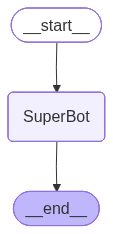

In [32]:
graph = StateGraph(State)
## Node
graph.add_node("SuperBot",superbot)

## Edges
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder = graph.compile()


## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [33]:
## Invocation
graph_builder.invoke({"messages":"Hi,My name is Pawan and i Like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Pawan and i Like cricket', additional_kwargs={}, response_metadata={}, id='ae1e4420-d336-4f76-b174-3e094fde9054'),
  AIMessage(content='Hi Pawan! It’s great to meet you. Cricket is an awesome sport. Do you have a favorite team or player?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 165, 'prompt_tokens': 19, 'total_tokens': 184, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o1-mini-2024-09-12', 'system_fingerprint': 'fp_1f2eb2a0a3', 'id': 'chatcmpl-CGkR1vA6hOqxohE6eHsLOU6RSyD2G', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3d2582fd-dadd-4e8d-9267-6fa2f60076ab-0', usage_metadata={'input_tokens': 19, 'output_tokens': 165, 'total_tokens': 184, 'input_token_details': {'audio': 0, 'ca

## Streaming the responses

In [34]:
for event in graph_builder.stream({"messages":"Hello My name is Pawan"},stream_mode = "values"):
    print(event)

{'messages': [HumanMessage(content='Hello My name is Pawan', additional_kwargs={}, response_metadata={}, id='aeb05f2a-7267-4101-a3d0-fa854659a465')]}
{'messages': [HumanMessage(content='Hello My name is Pawan', additional_kwargs={}, response_metadata={}, id='aeb05f2a-7267-4101-a3d0-fa854659a465'), AIMessage(content="Hello Pawan! It's great to meet you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 284, 'prompt_tokens': 14, 'total_tokens': 298, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o1-mini-2024-09-12', 'system_fingerprint': 'fp_1f2eb2a0a3', 'id': 'chatcmpl-CGkR8X8EVxiqRThx0CVpJLRWXeZrz', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6d43c1c0-c7ba-46bd-a6a2-cd1fc052be53-0', usage_metadata={'input_